In [ ]:
%pip install tensorflow-intel pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
try:
    df = pd.read_csv('shoppers_data.csv.csv', sep=',')
except:
    df = pd.read_csv('shoppers_data.csv.csv', sep=';')

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
print(f"Dataset Shape: {df.shape}")
print(f"Missing Values: {df.isnull().sum().sum()}")

Dataset Shape: (12330, 18)
Missing Values: 0


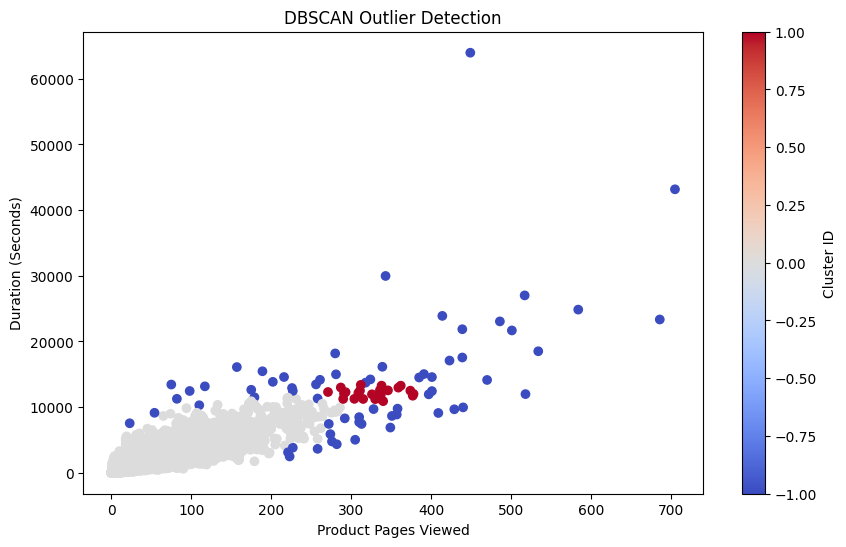

Original Data Size: 12330
Cleaned Data Size: 12266
Outliers Removed: 64


In [ ]:
features_dbscan = df[['ProductRelated', 'ProductRelated_Duration']]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(features_dbscan)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(x_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df['ProductRelated'], df['ProductRelated_Duration'], c=clusters, cmap='coolwarm', marker='o')
plt.title('DBSCAN Outlier Detection')
plt.xlabel('Product Pages Viewed')
plt.ylabel('Duration (Seconds)')
plt.colorbar(label='Cluster ID')
plt.show()

df_clean = df[clusters != -1].copy()

print(f"Original Data Size: {len(df)}")
print(f"Cleaned Data Size: {len(df_clean)}")
print(f"Outliers Removed: {len(df) - len(df_clean)}")

In [ ]:
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

label_encoder = LabelEncoder()

df['Month_Encoded'] = label_encoder.fit_transform(df['Month'])
df['VisitorType_Encoded'] = label_encoder.fit_transform(df['VisitorType'])
df['Revenue_Encoded'] = label_encoder.fit_transform(df['Revenue'])

feature_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'Total_Duration', 'Month_Encoded', 'VisitorType_Encoded'
]

X = df[feature_cols].values
y = df['Revenue_Encoded'].values

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

scaler_final = StandardScaler()
X_train = scaler_final.fit_transform(X_train)
X_val = scaler_final.transform(X_val)
X_test = scaler_final.transform(X_test)

print("--- Data Splitting Complete ---")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Validation Samples: {X_val.shape[0]}")
print(f"Test Samples: {X_test.shape[0]}")

--- Data Splitting Complete ---
Training Samples: 7891
Validation Samples: 1973
Test Samples: 2466


c:\Users\Akbarjon\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting Training...
Epoch 1/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8676 - loss: 0.3319 - val_accuracy: 0.8885 - val_loss: 0.2782
Epoch 2/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8987 - loss: 0.2629 - val_accuracy: 0.8931 - val_loss: 0.2717
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8990 - loss: 0.2531 - val_accuracy: 0.8925 - val_loss: 0.2694
Epoch 4/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8996 - loss: 0.2502 - val_accuracy: 0.8920 - val_loss: 0.2663
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9003 - loss: 0.2470 - val_accuracy: 0.8925 - val_loss: 0.2656
Epoch 6/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9027 - loss: 0.2432 - val_accuracy: 0.8900 - val_loss: 0.2620
Epoch 7/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9033 - loss: 0.2426 - val_accuracy: 0.8910 - val_loss: 0.2621
Epoch 8/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9063 - loss: 0.23

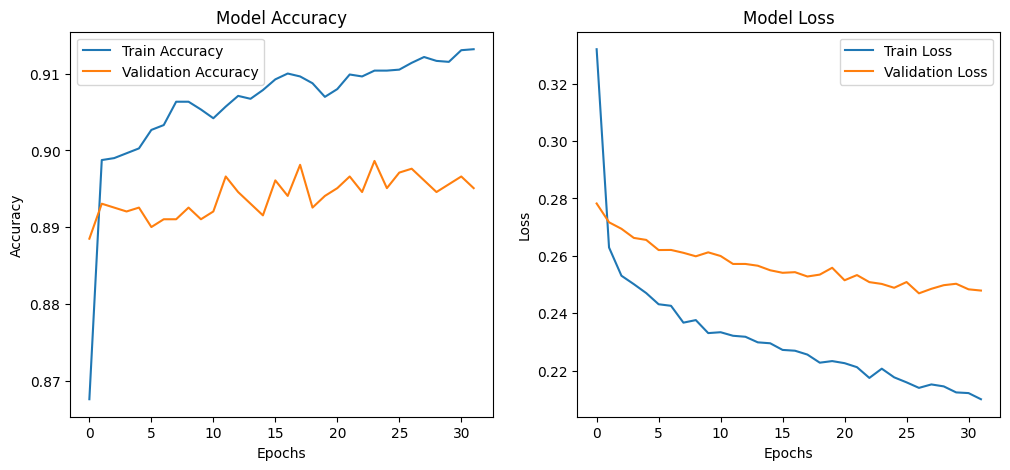

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2)) 

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("Starting Training...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,         
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

--- Final Test Set Evaluation ---
Test Accuracy: 88.36%
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

--- Classification Report ---
              precision    recall  f1-score   support

  No Revenue       0.91      0.96      0.93      2055
     Revenue       0.71      0.51      0.59       411

    accuracy                           0.88      2466
   macro avg       0.81      0.73      0.76      2466
weighted avg       0.87      0.88      0.88      2466



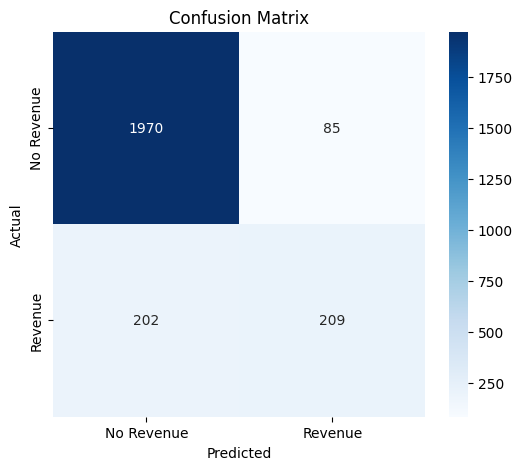

Model saved successfully as 'shoppers_model.keras'


In [ ]:
print("--- Final Test Set Evaluation ---")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue']))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Revenue', 'Revenue'], yticklabels=['No Revenue', 'Revenue'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

model.save('shoppers_model.keras')
print("Model saved successfully as 'shoppers_model.keras'")